# Project Description

The goal is to create a web application, introducing a trading algorithm which gives a suggestion to buy, not buy, sell, or hold, and then executes that trade through user input.

Trading platform will be Alpaca. Server will be on Replit. Web App will be on Anvil. See links below.

The algorithm will look at historical stock data 1 year prior to current date. It will use the parameters which can be retrieved from Alpaca to train the model. 

The model will also include sentiment score as an independent variable, which means historical articles from each day will need to be pulled to give an average sentiment score. 

The model will be trained on the top 10 stocks in 2024 in the S&P 500 by index weight. 

The model will output a prediction for the next week. Based on its prediction, the model will suggest to buy, not buy, sell, or hold.

# Links

https://anvil.works/

https://app.alpaca.markets/paper/dashboard/overview

https://replit.com/

# Login Information

Email: nshuckerow@ucsd.edu

Password: MGTA415data!

# Setting up Alpaca API Keys and Alpaca API

In [16]:
import os
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import pandas as pd

# Alpaca API credentials
ALPACA_API_KEY = "PKDFQIPQCXE38TAG1WKG"
ALPACA_SECRET_KEY = "LRaWwamsMm0WDa58x8S0z8wje9gRcYhcgtMf7C55"
ALPACA_URL = 'https://paper-api.alpaca.markets'

# Initialize Alpaca API
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, base_url=ALPACA_URL, api_version='v2')

# Fetching Stock Data

In [17]:
def get_historical_stock_data(symbols, start_date, end_date):
    # Use the correct TimeFrame object for daily data
    timeframe = tradeapi.TimeFrame.Day
    
    all_data = []
    
    for symbol in symbols:
        bars = alpaca.get_bars(
            symbol,
            timeframe=timeframe,
            start=start_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            end=end_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            adjustment='raw',
            feed='iex'
        )
        
        data = []
        for bar in bars:
            data.append({
                'symbol': symbol,  # Add the symbol to the data
                'time': bar.t,
                'open': bar.o,
                'high': bar.h,
                'low': bar.l,
                'close': bar.c,
                'volume': bar.v
            })
        
        all_data.extend(data)
    
    return pd.DataFrame(all_data)

# Top 50 Stocks in S&P 500 by Index Weight

In [18]:
top_50_sp500_stocks = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'AMZN',  # Amazon.com Inc.
    'NVDA',  # NVIDIA Corporation
    'GOOGL', # Alphabet Inc. (Class A)
    'GOOG',  # Alphabet Inc. (Class C)
    'TSLA',  # Tesla Inc.
    'META',  # Meta Platforms Inc.
    'BRK.B', # Berkshire Hathaway Inc. (Class B)
    'UNH',   # UnitedHealth Group Incorporated
    'JNJ',   # Johnson & Johnson
    'XOM',   # Exxon Mobil Corporation
    'V',     # Visa Inc.
    'PG',    # Procter & Gamble Co.
    'JPM',   # JPMorgan Chase & Co.
    'LLY',   # Eli Lilly and Company
    'MA',    # Mastercard Incorporated
    'HD',    # The Home Depot Inc.
    'CVX',   # Chevron Corporation
    'MRK',   # Merck & Co. Inc.
    'PEP',   # PepsiCo Inc.
    'ABBV',  # AbbVie Inc.
    'KO',    # The Coca-Cola Company
    'PFE',   # Pfizer Inc.
    'AVGO',  # Broadcom Inc.
    'COST',  # Costco Wholesale Corporation
    'MCD',   # McDonald's Corporation
    'TMO',   # Thermo Fisher Scientific Inc.
    'WMT',   # Walmart Inc.
    'DHR',   # Danaher Corporation
    'NKE',   # NIKE Inc.
    'DIS',   # The Walt Disney Company
    'ADBE',  # Adobe Inc.
    'NFLX',  # Netflix Inc.
    'VZ',    # Verizon Communications Inc.
    'CSCO',  # Cisco Systems Inc.
    'ABT',   # Abbott Laboratories
    'ACN',   # Accenture plc
    'NEE',   # NextEra Energy Inc.
    'LIN',   # Linde plc
    'TXN',   # Texas Instruments Incorporated
    'MDT',   # Medtronic plc
    'PM',    # Philip Morris International Inc.
    'WFC',   # Wells Fargo & Company
    'HON',   # Honeywell International Inc.
    'QCOM',  # QUALCOMM Incorporated
    'BMY',   # Bristol-Myers Squibb Company
    'LOW',   # Lowe's Companies Inc.
    'UNP',   # Union Pacific Corporation
    'RTX'    # Raytheon Technologies Corporation
]


## Creating end date and start date

In [19]:
# Retrieve historical stock data for the past year
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=30)
historical_data = get_historical_stock_data(top_50_sp500_stocks, start_date, end_date)

print(historical_data)

     symbol                      time     open     high      low    close  \
0      AAPL 2024-07-25 00:00:00-04:00  218.880  220.810  214.640  217.420   
1      AAPL 2024-07-26 00:00:00-04:00  218.940  219.480  216.040  218.030   
2      AAPL 2024-07-29 00:00:00-04:00  217.375  219.280  215.790  218.185   
3      AAPL 2024-07-30 00:00:00-04:00  219.300  220.270  216.120  218.680   
4      AAPL 2024-07-31 00:00:00-04:00  221.520  223.810  220.910  222.180   
...     ...                       ...      ...      ...      ...      ...   
1093    RTX 2024-08-19 00:00:00-04:00  117.975  118.520  117.975  118.350   
1094    RTX 2024-08-20 00:00:00-04:00  118.500  118.660  117.290  117.950   
1095    RTX 2024-08-21 00:00:00-04:00  118.575  118.575  116.955  117.265   
1096    RTX 2024-08-22 00:00:00-04:00  117.325  118.060  117.190  118.040   
1097    RTX 2024-08-23 00:00:00-04:00  118.170  118.170  118.170  118.170   

      volume  
0     642703  
1     661067  
2     381966  
3     559407  


Converting time column in stock data to datetime format

In [20]:
# Step 1: Convert the `time` column to a date format in the `market_df`
historical_data['date'] = pd.to_datetime(historical_data['time']).dt.date

historical_data.head()

,symbol,time,open,high,low,close,volume,date
0,AAPL,2024-07-25 00:00:00-04:00,218.880,220.81,214.64,217.420,642703,2024-07-25
1,AAPL,2024-07-26 00:00:00-04:00,218.940,219.48,216.04,218.030,661067,2024-07-26
2,AAPL,2024-07-29 00:00:00-04:00,217.375,219.28,215.79,218.185,381966,2024-07-29
3,AAPL,2024-07-30 00:00:00-04:00,219.300,220.27,216.12,218.680,559407,2024-07-30
4,AAPL,2024-07-31 00:00:00-04:00,221.520,223.81,220.91,222.180,549326,2024-07-31


# Use Alpaca API to return News Articles

The get_news function returns articles for the specified period. The function takes in a stock symbol, the max return results, and number of days. The default number of days is 1, and default max results is 200.

In [21]:
import requests
from datetime import datetime, timedelta
import time

def get_news(symbols, days_prior=1):
    today = datetime.utcnow()
    yesterday = today - timedelta(days=days_prior)  # Adjusted to retrieve news from the previous day
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": ALPACA_API_KEY,
        "APCA-API-SECRET-KEY": ALPACA_SECRET_KEY
    }
    news = []
    page_token = None
    
    while True:
        params = {
            "symbols": ",".join(symbols),
            "start": start_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "end": today.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "limit": 50,  # Maximum allowed by the API
            "page_token": page_token  # For pagination
        }
        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            result = response.json()
            
            news.extend(result.get('news', []))
            
            # Get the next page token if available
            page_token = result.get('next_page_token')
            
            if not page_token:  # No more pages to fetch
                break
            
        except requests.exceptions.HTTPError as e:
            if response.status_code == 429:
                print("Rate limit reached. Sleeping for 10 seconds...")
                time.sleep(1)  # Wait for 60 seconds before retrying
            else:
                print(f"HTTP error occurred: {e}")
                break
        except Exception as e:
            print(f"An error occurred: {e}")
            break
        
    return news

# Example usage

# Retrieve news for specific symbols

news = get_news(top_50_sp500_stocks, days_prior=30)



Converting news data to a dataframe

In [22]:
news_df = pd.DataFrame(news)
news_df.head()

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url
0,Benzinga Newsdesk,,2024-08-23T13:17:13Z,Top 10 Trending Stocks On WallStreetBets As Of...,40527613,[],benzinga,,"[ASTS, LOT, LUNR, MADE, NVDA, QQQ, RBLX, RKLB,...",2024-08-23T13:17:14Z,https://www.benzinga.com/trading-ideas/24/08/4...
1,Benzinga Newsdesk,,2024-08-23T13:06:33Z,Evercore ISI Group Maintains Outperform on NVI...,40527285,[],benzinga,,[NVDA],2024-08-23T13:06:34Z,https://www.benzinga.com/news/24/08/40527285/e...
2,Avi Kapoor,,2024-08-23T12:50:47Z,"Amazon, Target, JPMorgan And More: CNBC's 'Fin...",40526977,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Odyssey Capital Advisors&#39; Jason Snipe like...,"[AMZN, IYR, JPM, TGT]",2024-08-23T12:50:48Z,https://www.benzinga.com/trading-ideas/long-id...
3,Avi Kapoor,,2024-08-23T12:43:20Z,Top 2 Risk Off Stocks That May Crash In Q3,40526663,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,,"[PM, WMT]",2024-08-23T12:43:21Z,https://www.benzinga.com/news/24/08/40526663/t...
4,Anusuya Lahiri,,2024-08-23T12:25:55Z,What's Going On With AMD Stock On Friday?,40526391,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,AMD claims Windows 11 update will boost perfor...,"[AMD, MSFT, NVDA, QQQ, SMCI, SPY]",2024-08-23T12:25:56Z,https://www.benzinga.com/news/24/08/40526391/w...


In [23]:
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
import pandas as pd

# Load the model and tokenizer
model_name = "yiyanghkust/finbert-tone"  # Example of a financial sentiment model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/opt/conda/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
# Function to split text into 512-token chunks based on tokenization
def split_into_chunks(text, max_length=500):
    tokens = tokenizer(text, return_tensors="pt", truncation=False)['input_ids'][0]
    # Ensure each chunk is no more than 512 tokens
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        # Make sure the chunk is exactly 512 tokens or less
        if len(chunk) > max_length:
            chunk = chunk[:max_length]
        chunks.append(chunk)
    return chunks

In [25]:
# Function to analyze sentiment for long texts
def analyze_sentiment(text):
    chunks = split_into_chunks(text)
    sentiments = []
    for chunk in chunks:
        # Convert tokens back to text before sentiment analysis
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)
        sentiments.append(nlp(chunk_text)[0])
    
    # Aggregate sentiment scores (e.g., by averaging)
    avg_sentiment_score = sum(s['score'] for s in sentiments) / len(sentiments)
    # Determine overall sentiment by majority vote or averaging
    positive_scores = sum(s['score'] for s in sentiments if s['label'] == 'positive')
    negative_scores = sum(s['score'] for s in sentiments if s['label'] == 'negative')
    sentiment_label = 'positive' if positive_scores >= negative_scores else 'negative'
    
    return sentiment_label, avg_sentiment_score

In [26]:
# Function to calculate the overall sentiment score
'''def calculate_overall_sentiment(row):
    content_label, content_score = analyze_sentiment(row['summary'])
    headline_label, headline_score = analyze_sentiment(row['headline'])
    
    # Average the sentiment scores of content and headline
    overall_score = (content_score + headline_score) / 2
    overall_label = 'positive' if (content_score + headline_score) >= 1 else 'negative'
    
    return overall_label, overall_score'''

"def calculate_overall_sentiment(row):\n    content_label, content_score = analyze_sentiment(row['summary'])\n    headline_label, headline_score = analyze_sentiment(row['headline'])\n    \n    # Average the sentiment scores of content and headline\n    overall_score = (content_score + headline_score) / 2\n    overall_label = 'positive' if (content_score + headline_score) >= 1 else 'negative'\n    \n    return overall_label, overall_score"

In [27]:
# Apply the overall sentiment analysis function to your DataFrame
news_df['sentiment'], news_df['sentiment_score'] = zip(*news_df['headline'].apply(analyze_sentiment))

Creating data columns for the news data, finding average sentiment score for each day and each symbol, then creating a new dataframe with the average sentiment score for each day and symbol.

In [28]:
import pandas as pd

# Assume your DataFrame is named `news_df`

# Step 1: Convert 'created_at' column to datetime format
news_df['created_at'] = pd.to_datetime(news_df['created_at'])

# Step 2: Extract the date (without the time) from the 'created_at' column
news_df['date'] = news_df['created_at'].dt.date

# Step 3: Explode the 'symbols' column directly since it's already a list
news_copy = news_df.explode('symbols')

# Step 4: Group by the extracted date and symbol, and calculate the average sentiment score
daily_sentiment = news_copy.groupby(['date', 'symbols'])['sentiment_score'].mean().reset_index()

# Step 5: Rename the columns for clarity
daily_sentiment.columns = ['date', 'symbol', 'average_sentiment_score']

# Display the result
print(daily_sentiment)


            date symbol  average_sentiment_score
0     2023-12-01   TSLA                 0.999948
1     2024-04-29   TSLA                 0.961141
2     2024-06-18   NVDA                 0.510231
3     2024-07-19   AAPL                 0.999999
4     2024-07-22   TSLA                 0.999939
...          ...    ...                      ...
4359  2024-08-23    WAY                 0.999999
4360  2024-08-23    WBD                 0.999992
4361  2024-08-23   WDAY                 1.000000
4362  2024-08-23    WMT                 0.734125
4363  2024-08-23     ZM                 0.947836

[4364 rows x 3 columns]


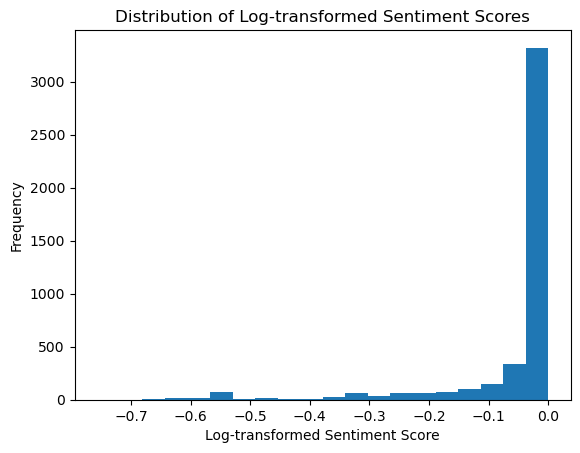

In [29]:
# display a bar chart showing distribution of sentiment scores. first log transform the data. dont group by symbol. show the score range and frequency

import matplotlib.pyplot as plt
import numpy
import math

# Log-transform the sentiment scores
daily_sentiment['log_sentiment_score'] = daily_sentiment['average_sentiment_score'].apply(lambda x: math.log(x))

# Plot the distribution of log-transformed sentiment scores
plt.hist(daily_sentiment['log_sentiment_score'], bins=20)
plt.xlabel('Log-transformed Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Log-transformed Sentiment Scores')
plt.show()

This is where we would discuss how we would use various sources to get a variety of data. Getting news from only one source will be bias. And in this case, we are only getting news from Alpaca and the majority of the headlines are extremely positive. Right

Merging the stock data and news data

In [30]:
stock_data_merged = pd.merge(historical_data, daily_sentiment, how='left', on=['date', 'symbol'])

# save to csv named stock_data.csv

stock_data_merged.to_csv('stock_data.csv', index=False)


stock_data_merged.head()

,symbol,time,open,high,low,close,volume,date,average_sentiment_score,log_sentiment_score
0,AAPL,2024-07-25 00:00:00-04:00,218.880,220.81,214.64,217.420,642703,2024-07-25,0.947577,-0.053847
1,AAPL,2024-07-26 00:00:00-04:00,218.940,219.48,216.04,218.030,661067,2024-07-26,0.972036,-0.028362
2,AAPL,2024-07-29 00:00:00-04:00,217.375,219.28,215.79,218.185,381966,2024-07-29,0.955637,-0.045377
3,AAPL,2024-07-30 00:00:00-04:00,219.300,220.27,216.12,218.680,559407,2024-07-30,0.964756,-0.035880
4,AAPL,2024-07-31 00:00:00-04:00,221.520,223.81,220.91,222.180,549326,2024-07-31,0.989995,-0.010056
